### Assignment

So here's your task. Get rid of as much data as possible without dropping below an average of 90% accuracy in a 10-fold cross validation. You'll want to do a few things in this process. First, dive into the data that we have and see which features are most important. This can be the raw features or the generated dummies. You may want to use PCA or correlation matrices. Can you do it without using anything related to payment amount or outstanding principal? How do you know?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    'https://www.dropbox.com/s/0so14yudedjmm5m/LoanStats3d.csv?dl=1',
    skipinitialspace=True,
    header=1
)

# Note the warning about dtypes.

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


## Data Cleaning



In [7]:
categorical = y2015.select_dtypes(include=['object'])

for i in categorical:
    column = categorical[i]
   

In [8]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [9]:
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

In [10]:
pd.get_dummies(y2015)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,14.85,379.39,48000.0,33.18,0.0,...,0,0,0,0,0,1,0,0,0,0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,7.49,298.58,60000.0,22.44,0.0,...,0,0,0,0,0,1,0,0,0,0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,7.49,777.55,109000.0,26.02,0.0,...,0,0,0,0,0,1,0,0,0,0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,6.49,858.05,92000.0,21.60,0.0,...,0,0,0,0,0,1,0,0,0,0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,19.89,320.99,55000.0,25.49,0.0,...,0,0,0,0,0,1,0,0,0,0
5,68506798.0,73396623.0,23000.0,23000.0,23000.0,8.49,471.77,64000.0,18.28,0.0,...,0,0,0,0,0,1,0,0,0,0
6,68566886.0,73456723.0,29900.0,29900.0,29900.0,12.88,678.49,65000.0,21.77,0.0,...,0,0,0,0,0,1,0,0,0,0
7,68577849.0,73467703.0,18000.0,18000.0,18000.0,11.99,400.31,112000.0,8.68,0.0,...,0,0,0,0,0,1,0,0,0,0
8,66310712.0,71035433.0,35000.0,35000.0,35000.0,14.85,829.90,110000.0,17.06,0.0,...,0,0,0,0,0,1,0,0,0,0
9,68476807.0,73366655.0,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,...,0,0,0,0,0,1,0,0,0,0


## Second Attempt


In [29]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)


print('primera X: {}'.format(X))
Y = y2015['loan_status']
X = pd.get_dummies(X)
print('segunda X: {}'.format(X))
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

primera X:                 id   member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0       68009401.0  72868139.0    16000.0      16000.0          16000.0   
1       68354783.0  73244544.0     9600.0       9600.0           9600.0   
2       68466916.0  73356753.0    25000.0      25000.0          25000.0   
3       68466961.0  73356799.0    28000.0      28000.0          28000.0   
4       68495092.0  73384866.0     8650.0       8650.0           8650.0   
5       68506798.0  73396623.0    23000.0      23000.0          23000.0   
6       68566886.0  73456723.0    29900.0      29900.0          29900.0   
7       68577849.0  73467703.0    18000.0      18000.0          18000.0   
8       66310712.0  71035433.0    35000.0      35000.0          35000.0   
9       68476807.0  73366655.0    10400.0      10400.0          10400.0   
10      68341763.0  72928789.0    20000.0      20000.0          20000.0   
11      68356421.0  73246236.0    22400.0      22400.0          22400.0   
12      684265

segunda X:                 id   member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0       68009401.0  72868139.0    16000.0      16000.0          16000.0   
1       68354783.0  73244544.0     9600.0       9600.0           9600.0   
2       68466916.0  73356753.0    25000.0      25000.0          25000.0   
3       68466961.0  73356799.0    28000.0      28000.0          28000.0   
4       68495092.0  73384866.0     8650.0       8650.0           8650.0   
5       68506798.0  73396623.0    23000.0      23000.0          23000.0   
6       68566886.0  73456723.0    29900.0      29900.0          29900.0   
7       68577849.0  73467703.0    18000.0      18000.0          18000.0   
8       66310712.0  71035433.0    35000.0      35000.0          35000.0   
9       68476807.0  73366655.0    10400.0      10400.0          10400.0   
10      68341763.0  72928789.0    20000.0      20000.0          20000.0   
11      68356421.0  73246236.0    22400.0      22400.0          22400.0   
12      684265

array([0.98064639, 0.98040892, 0.98164375, 0.98162   , 0.95744479,
       0.97922109, 0.92954   , 0.98059797, 0.98014582, 0.9802166 ])

## DRILL: Third Attempt

So here's your task. Get rid of as much data as possible without dropping below an average of 90% accuracy in a 10-fold cross validation.

You'll want to do a few things in this process. First, dive into the data that we have and see which features are most important. This can be the raw features or the generated dummies. You may want to use PCA or correlation matrices.

Can you do it without using anything related to payment amount or outstanding principal? How do you know?

In [15]:
y2015['numeric_loan_status'] = y2015['loan_status']

count=0
dictionary = {}

for i in list(y2015['loan_status'].unique()):
    dictionary[i]=count
    count+=1

#Mapping numbers
y2015['numeric_loan_status']=y2015['numeric_loan_status'].map(dictionary)

correlation = y2015.corr()
cor_target = abs(correlation['numeric_loan_status'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]


y2015 = y2015.drop('numeric_loan_status',1)
relevant_features.drop('numeric_loan_status')

list_features = list(relevant_features.index)


All null values are in yellow


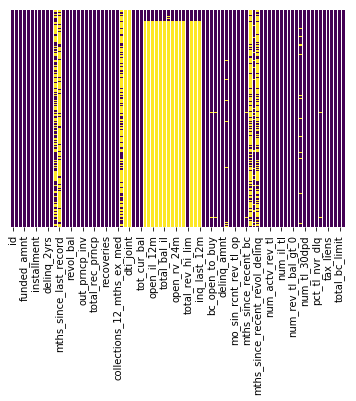

In [17]:
#Verifying null values
list_features.remove('numeric_loan_status')
import seaborn as sns

print('All null values are in yellow')
sns.heatmap(y2015[list_features].isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [22]:
nullcounts = round(y2015.isnull().sum()*100/y2015.isnull().count(),2)

columnstoberemoved = []

for value,index in zip(nullcounts.values,nullcounts.index):
    if value > 10:
        print('{},{}'.format(value,index))
        columnstoberemoved.append(index)
        if index in list_features:
            list_features.remove(index)
       
        
y2015 = y2015.drop(columns=columnstoberemoved)


48.44,mths_since_last_delinq
82.33,mths_since_last_record
27.82,next_pymnt_d
70.85,mths_since_last_major_derog
99.88,annual_inc_joint
99.88,dti_joint
99.88,verification_status_joint
94.92,open_acc_6m
94.92,open_il_6m
94.92,open_il_12m
94.92,open_il_24m
95.06,mths_since_rcnt_il
94.92,total_bal_il
95.58,il_util
94.92,open_rv_12m
94.92,open_rv_24m
94.92,max_bal_bc
94.92,all_util
94.92,inq_fi
94.92,total_cu_tl
94.92,inq_last_12m
74.21,mths_since_recent_bc_dlq
10.59,mths_since_recent_inq
63.97,mths_since_recent_revol_delinq


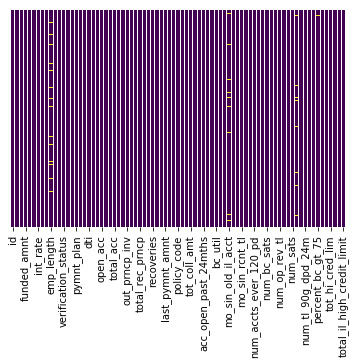

In [23]:
sns.heatmap(y2015.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [25]:
#Using PCA

from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = y2015[list_features]
X = X.dropna(axis=1)

# Normalizing data to get all variables with mean = 0 and standard deviation = 1

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
y2015["pca_1"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by first component from Sklearn PCA: ',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by first component from Sklearn PCA:  [0.17907768]


In [27]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)


print('primera X: {}'.format(X))
Y = y2015['loan_status']
X = pd.get_dummies(X)
print('segunda X: {}'.format(X))
X = X.dropna(axis=1)

primera X:                 id   member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0       68009401.0  72868139.0    16000.0      16000.0          16000.0   
1       68354783.0  73244544.0     9600.0       9600.0           9600.0   
2       68466916.0  73356753.0    25000.0      25000.0          25000.0   
3       68466961.0  73356799.0    28000.0      28000.0          28000.0   
4       68495092.0  73384866.0     8650.0       8650.0           8650.0   
5       68506798.0  73396623.0    23000.0      23000.0          23000.0   
6       68566886.0  73456723.0    29900.0      29900.0          29900.0   
7       68577849.0  73467703.0    18000.0      18000.0          18000.0   
8       66310712.0  71035433.0    35000.0      35000.0          35000.0   
9       68476807.0  73366655.0    10400.0      10400.0          10400.0   
10      68341763.0  72928789.0    20000.0      20000.0          20000.0   
11      68356421.0  73246236.0    22400.0      22400.0          22400.0   
12      684265

segunda X:                 id   member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0       68009401.0  72868139.0    16000.0      16000.0          16000.0   
1       68354783.0  73244544.0     9600.0       9600.0           9600.0   
2       68466916.0  73356753.0    25000.0      25000.0          25000.0   
3       68466961.0  73356799.0    28000.0      28000.0          28000.0   
4       68495092.0  73384866.0     8650.0       8650.0           8650.0   
5       68506798.0  73396623.0    23000.0      23000.0          23000.0   
6       68566886.0  73456723.0    29900.0      29900.0          29900.0   
7       68577849.0  73467703.0    18000.0      18000.0          18000.0   
8       66310712.0  71035433.0    35000.0      35000.0          35000.0   
9       68476807.0  73366655.0    10400.0      10400.0          10400.0   
10      68341763.0  72928789.0    20000.0      20000.0          20000.0   
11      68356421.0  73246236.0    22400.0      22400.0          22400.0   
12      684265

In [28]:
cross_val_score(rfc, X, Y, cv=10)

array([0.97998148, 0.9801952 , 0.98102634, 0.98157251, 0.96238423,
       0.97850867, 0.96682419, 0.98038424, 0.97988458, 0.97952786])

**Results are better in this last attempt**